## Описание проекта
### Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Часть 1. Приоритизация гипотез.
Есть 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача
* 		Примените фреймворк ICE для приоритизации гипотез. 
* 		Примените фреймворк RICE для приоритизации гипотез. 
* 		Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

#### Задача
Проанализируйте A/B-тест:
* Постройте график кумулятивной выручки по группам.
* Постройте график кумулятивного среднего чека по группам. 
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. 
* Постройте график кумулятивной конверсии по группам. 
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. 
* Постройте точечный график количества заказов по пользователям. 
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. 
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. 
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. 
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
* Примите решение по результатам теста и объясните его. 
* Сделайте выводы и предположения.

Варианты решений: 
- 1. Остановить тест, зафиксировать победу одной из групп. 
- 2. Остановить тест, зафиксировать отсутствие различий между группами. 
- 3. Продолжить тест.

## Импорт данных

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

### Приоритизируем гипотезы

In [3]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']

In [5]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000


In [7]:
pd.options.display.max_colwidth = 500

In [8]:
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


<hr style="border: 2px solid green;" />

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [9]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']

print(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Приоритезация по RICE изменила сортировку гипотез. 
Коэффициет Reach поднял в скоринге гипотезы с высоким охватом, и опустил гипотезы с небольшим охватом.
Например, повысился приоритет:
- 1 место заняла гипотеза №7, так как у нее самый большой охват - 10. Ранее занимала 3 место
- 2 место заняла гипотеза №2, так как у нее охват 8. И это повысило скоринг гипотезы с высоким Confidence (7) и низким Efforts (3). Ранее гипотеза занимала 5 место

Понизился приоритет
- 8 место заняла гипотеза №5. Охват маленький - 3. И хотя гипотеза с невысоким Efforts, и ее можно сделать быстро, невысокие Impact и Reach понизили ее приоритет
- 7 место заняла гипотеза №1. Маленький охват (2) уменьшил приоритет

### Часть 2. Анализ A/B-теста

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [10]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [12]:
orders[['date', 'group']].drop_duplicates()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Добавим и рассчитаем новые столбцы
* 		ordersPerDateA — количество заказов в выбранную дату в группе A;
* 		revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* 		ordersPerDateB — количество заказов в выбранную дату в группе B;
* 		revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* 		ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* 		revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* 		ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* 		revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* 		visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* 		visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* 		visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* 		visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.


In [13]:
ordersADaily = (orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [14]:
ordersACummulative = (ordersADaily.apply(
    lambda x: 
        ordersADaily[ordersADaily['date'] <= x['date']]
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date']))
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [15]:
ordersBDaily = (orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [16]:
ordersBCummulative = (ordersBDaily.apply(
    lambda x: 
        ordersBDaily[ordersBDaily['date'] <= x['date']]
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date']))
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [17]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [18]:
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))
display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


#### Построим график кумулятивной выручки по группам

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


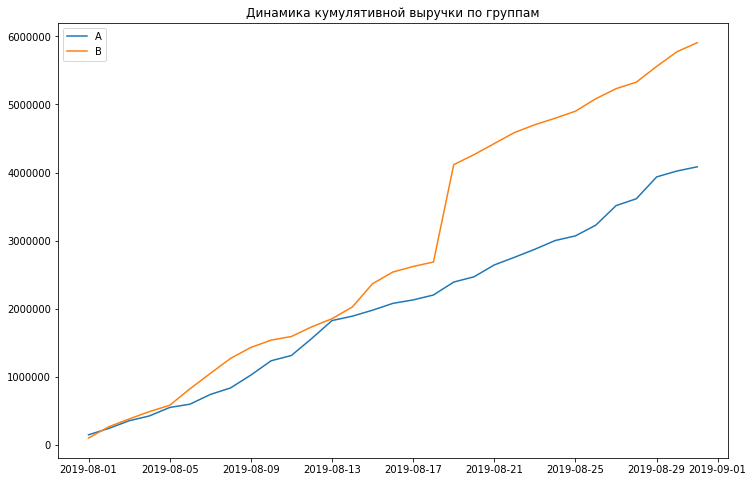

In [19]:
plt.figure(figsize=(12,8))
# Строим график выручки группы А
plt.plot(ordersACummulative['date'], ordersACummulative['revenueCummulativeA'], label='A')

# Строим график выручки группы B
plt.plot(ordersBCummulative['date'], ordersBCummulative['revenueCummulativeB'], label='B')
plt.title('Динамика кумулятивной выручки по группам')
plt.legend();

####  Выводы и предположения по графику кумулятивной выручки по группам

Выводы:
- Группа B быстро обогнала группу А по кумулятивной выручке
- Значительный скачок кумулятивной выручки произошел около 18-19 августа 2020. 

Предположение:
- Значительный скачок выручки может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

---------

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

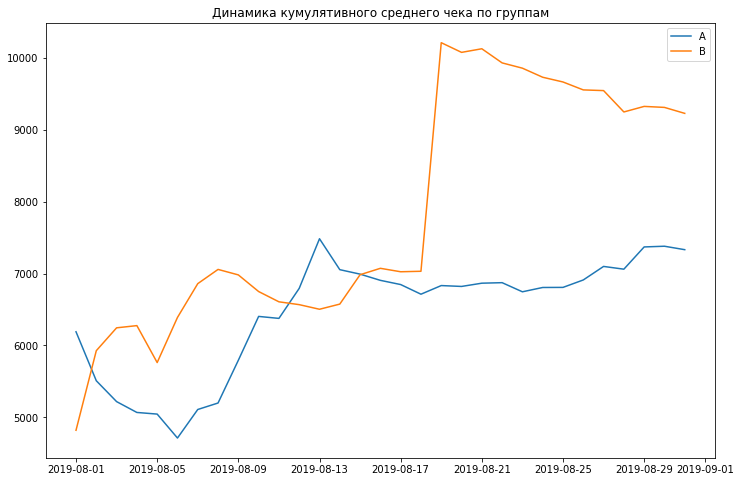

In [20]:
plt.figure(figsize=(12,8))

# посчитаем кумулятивный средний чек по группе А
plt.plot(ordersACummulative['date'], ordersACummulative['revenueCummulativeA']/ordersACummulative['ordersCummulativeA'], label='A')

# посчитаем кумулятивный средний чек по группе В
plt.plot(ordersBCummulative['date'], ordersBCummulative['revenueCummulativeB']/ordersBCummulative['ordersCummulativeB'], label='B')
plt.title('Динамика кумулятивного среднего чека по группам')
plt.legend();

#### Выводы и предположения по графику среднего чека по группам

Группа В:
- На графике выделяется резкий рост кумулятивного среднего чека группы В. Возможно, в группу B во второй половине теста попали крупные заказы. 

Динамика кумулятивного среднего чека по группе А:
- 2-10 августа 2019 средний чек группы А был заметно ниже среднего чека группы В. 
- 9-13 августа произошел рост среднего чека группы А - он превысил кумулятивный средник чек группы В и составил около 7500.
- С 14 августа средний чек группы А немного снизился и стабилизировался на отметке около 7000

---------

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Построим график относительного различия для среднего чека. 
Добавим горизонтальную ось методом axhline():

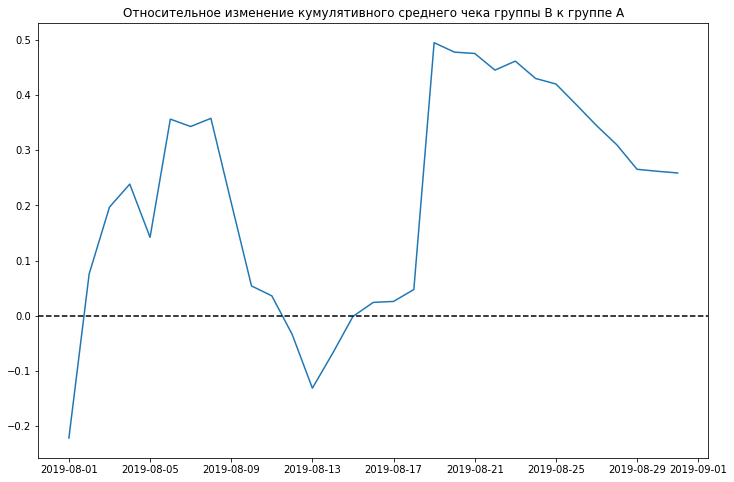

In [21]:
plt.figure(figsize=(12,8))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = ordersACummulative.merge(ordersBCummulative, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueCummulativeB']/mergedCumulativeRevenue['ordersCummulativeB'])/(mergedCumulativeRevenue['revenueCummulativeA']/mergedCumulativeRevenue['ordersCummulativeA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

#### Выводы и предположения из графика относительного изменения кумулятивного среднего чека группы B к группе A

В нескольких точках график различия между сегментами резко «скачет». Наверняка в эти даты произошли крупные заказы и выбросы в группе В:
- 4 августа 2019
- 6-8 августа
- 19 августа - самый заметный пик

----------

#### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                      .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


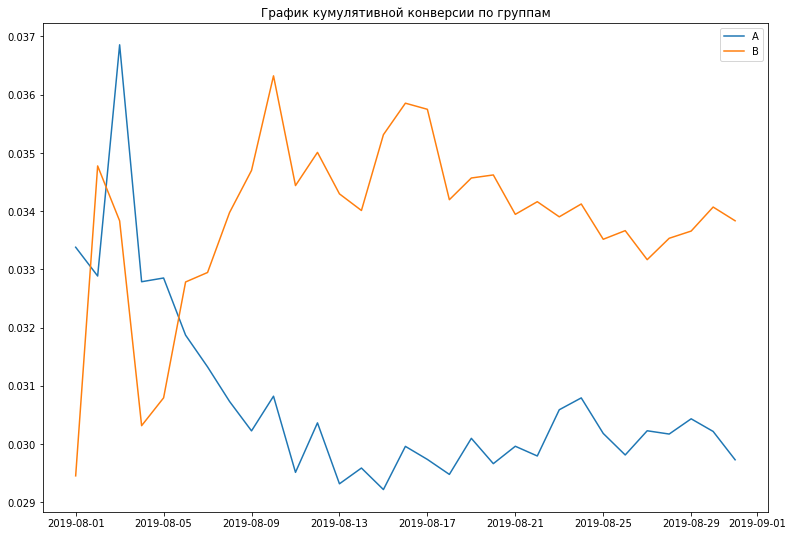

In [23]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(13,9))
plt.title('График кумулятивной конверсии по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

####  Выводы и предположения по графику кумулятивной конверсии

- конверсия группы B на 6 день эксперимента обгоняет конвесрию группы А и остаетс значимо выше
- эксперимент растит конверсию

--------

#### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

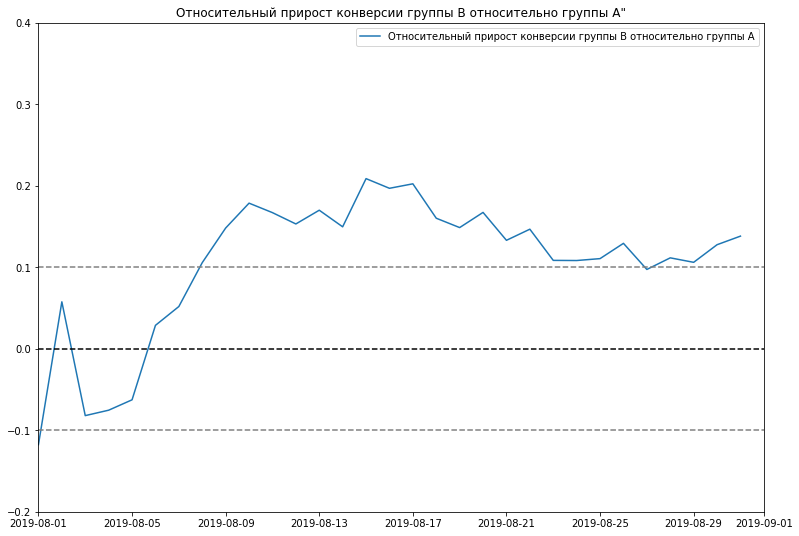

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(13,9))
plt.title('Относительный прирост конверсии группы B относительно группы A"')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.4]);

#### Выводы и предположения по графику относительного изменения кумулятивной конверсии группы B к группе A

- стабильноый прирост конверсии группы В к группе А есть
- примерно с 06.08.2019 конверсия группы В превысила конверсию группы А и почти все оставшееся время стабильно превышает ее на 0.1

---------

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

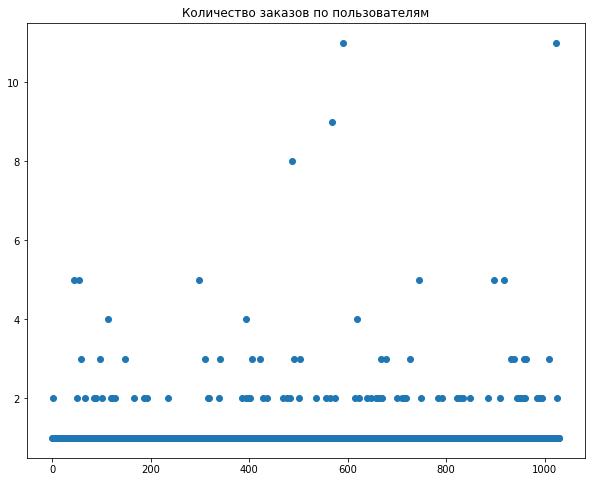

In [25]:
plt.figure(figsize=(10,8))
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']
plt.title('Количество заказов по пользователям')

x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders']);

#### Сделайте выводы и предположения по точечному графику количества заказов по пользователям. 

- основное количество заказов на пользователя - 1 и 2
- есть заметное количество пользователей, сделавшее 3 заказа
- и заметно меньше пользователей сделало 4-5 заказов
- крайне редко встречаются 8-12 заказов на пользователя

----------

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


#### Выберите границу для определения аномальных пользователей.

За границу возьмем пользователей с более чем 4 заказами, так как отсечка по 2 заказам уберет слишком много данных.
Выбранный процентиль - 99


In [27]:
percentile_99_orders =  np.percentile(ordersByUsers['orders'], 99)


----------

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

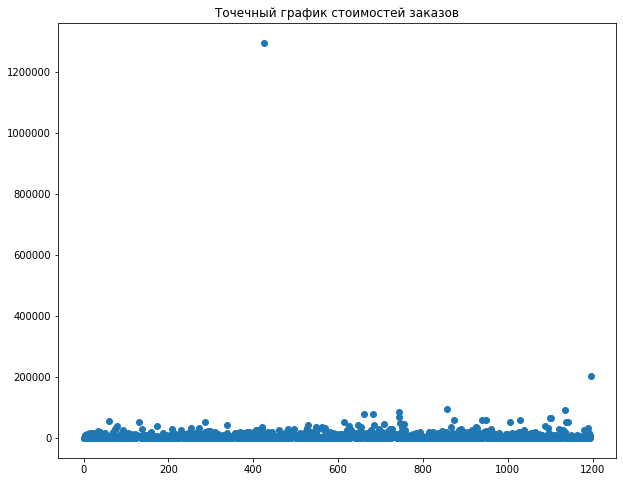

In [28]:
plt.figure(figsize=(10,8))

plt.title('Точечный график стоимостей заказов')
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

####  Выводы и предположения по точечному графику стоимостей заказов. 

- 1 заказ на более чем 1200000 сбил всю картину
- еще 1 заказ на 200000 тоже явно выделяется
- в целом заказы в диапазоне менее 100000
------

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [29]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


#### Выберем 95 персентиль как границу для определения аномальных заказов - от 28000 и более

In [30]:
percentile_95_revenue = np.percentile(orders['revenue'], 95)

### Конверсия

#### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

#### Проверка z-критерием

Перед применением критерия нужно проверить распределение данных

In [31]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [32]:
data['conversionCummulativeA'] = data['ordersPerDateA'] / data['visitorsPerDateA']
data['conversionCummulativeB'] = data['ordersPerDateB'] / data['visitorsPerDateB']

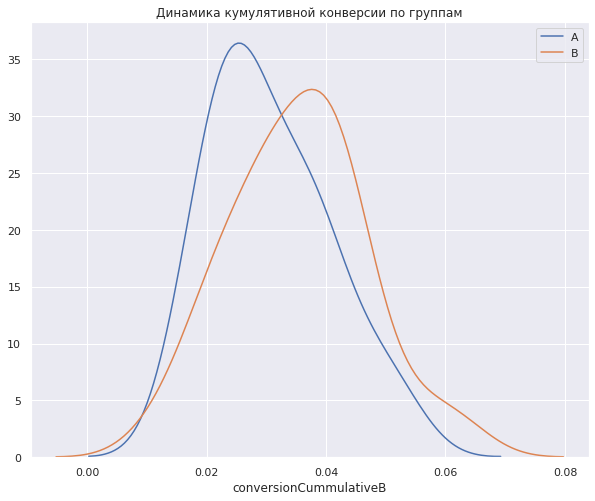

In [33]:
#### Гистограмма распределения кумулятивной конверсии по группам
sns.set()
plt.figure(figsize=(10,8))
plt.xlabel('Кумулятивная конверсия по группам')
plt.title('Динамика кумулятивной конверсии по группам')

sns.distplot(data['conversionCummulativeA'], hist=False, rug=False, label='A')
sns.distplot(data['conversionCummulativeB'], hist=False, rug=False, label='B');

In [34]:
####Перед расчетом стат значимости посмотрим распределение на графиках
data['conversionCummulativeA'] = data['ordersPerDateA'] / data['visitorsPerDateA']
data['conversionCummulativeB'] = data['ordersPerDateB'] / data['visitorsPerDateB']

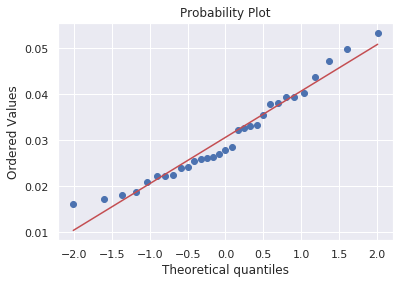

In [35]:
stats.probplot(data['conversionCummulativeA'], dist='norm', plot=plt);

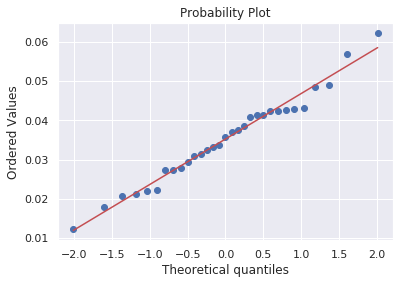

In [36]:
stats.probplot(data['conversionCummulativeB'], dist='norm', plot=plt);

In [37]:
#Проверим нормальность распределения кумулятивной конверсии группы B методом Шапиро-Уилка
alpha = .05 # критический уровень статистической значимости

results = st.shapiro(data['conversionCummulativeB'])
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. Распределение нормальное")

p-значение:  0.8641592860221863
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. Распределение нормальное


In [38]:
#Проверим нормальность распределения кумулятивной конверсии группы A методом Шапиро-Уилка
alpha = .05 # критический уровень статистической значимости

results = st.shapiro(data['conversionCummulativeA'])
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. Распределение нормальное")

p-значение:  0.18165241181850433
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. Распределение нормальное


####  Судя по графикам и Шапиро Уилку распределение нормальное. Считаем по z-критерию можно ли сделать вывод о разнице в конверсии

In [39]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([data['ordersPerDateA'].sum(),data['ordersPerDateB'].sum()])
trials = np.array([data['visitorsPerDateA'].sum(), data['visitorsPerDateB'].sum()])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

Если бы пропорции были равны, разница между ними была бы равна нулю. Посчитаем, как далеко статистика уехала от нуля. Какова вероятность получить такое отличие или больше? Так как распределение статистики нормальное, вызовем метод cdf(). Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака. Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат:

In [40]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу: между долями есть значимая разница


#### Вывод
По сырым данным различие в конверсии групп A и B есть. 
p-value = 0.023 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

#### Предположение
Средняя конверсия в выборке B значимо отличается от средней конверсии в выборке А. Вероятно, наша тестируемая влияет на конверсию

### Средний чек

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Проверим нормальность распределения

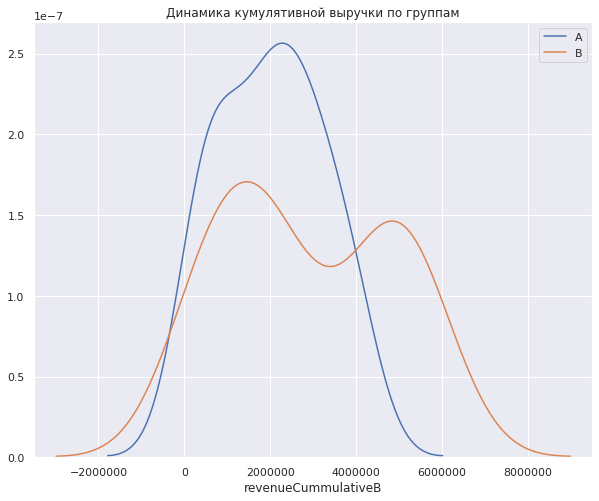

In [41]:
#### Гистограмма распределения кумулятивной выручки по группам
sns.set()
plt.figure(figsize=(10,8))
plt.xlim(-3500000, 9500000)
plt.xlabel('Кумулятивная выручка по группам')
plt.title('Динамика кумулятивной выручки по группам')

sns.distplot(ordersACummulative['revenueCummulativeA'], hist=False, rug=False, label='A')
sns.distplot(ordersBCummulative['revenueCummulativeB'], hist=False, rug=False, label='B');

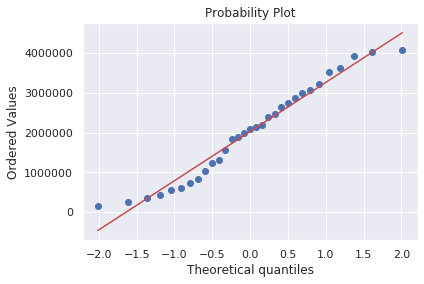

In [42]:
stats.probplot(ordersACummulative['revenueCummulativeA'], dist='norm', plot=plt);

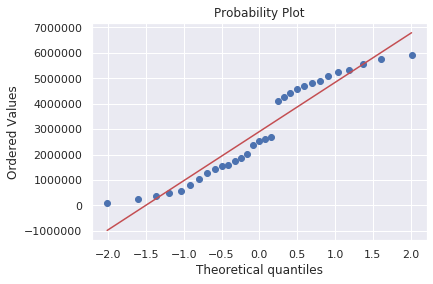

In [43]:
stats.probplot(ordersBCummulative['revenueCummulativeB'], dist='norm', plot=plt);

Распределение, график и Шапиро Уилка говорят что распределение нормальное. Проверим статзначимость различий t-критерием Стьюдента  

In [44]:
sample_1 = orders[orders['group']=='A']['revenue']
sample_2 = orders[orders['group']=='B']['revenue']


alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.403693443754076
Не получилось отвергнуть нулевую гипотезу


#### Выводы
- P-value значительно больше 0.05. 
- Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

#### Предположение
Возможно, эксперимент не влияет на средний чек

-------

### Конверсия по очищенным данным

#### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [45]:
# посчитаем количество заказов на пользователя в группах
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'transactionId']

In [46]:
#вычислим пользователей, которые сделали много заказов и более дорогие заказы, чем мы определили как пороговые значения
usersWithManyOrders = (pd.concat([ordersByUsersA[ordersByUsersA['transactionId'] > percentile_99_orders]['visitorId'], 
                                  ordersByUsersB[ordersByUsersB['transactionId'] > percentile_99_orders]['visitorId']], 
                                 axis = 0))
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_95_revenue]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)


1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64
(59,)


In [47]:
# отфильтруем в таблице заказов строки пользователей, которые превысили допустимые пороги
orders_filtered = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

In [48]:
orders_filtered

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [49]:
# пересобираем data по фильтрованным данным
ordersADaily_filtered = (orders_filtered[orders_filtered['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}))
ordersADaily_filtered.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


ordersACummulative_filtered = (ordersADaily_filtered.apply(
    lambda x: 
        ordersADaily_filtered[ordersADaily_filtered['date'] <= x['date']]
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date']))
ordersACummulative_filtered.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']


ordersBDaily_filtered = (orders_filtered[orders_filtered['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}))
ordersBDaily_filtered.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative_filtered = (ordersBDaily_filtered.apply(
    lambda x: 
        ordersBDaily_filtered[ordersBDaily_filtered['date'] <= x['date']]
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date']))
ordersBCummulative_filtered.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


visitorsADaily_filtered = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily_filtered.columns = ['date', 'visitorsPerDateA']

visitorsACummulative_filtered = visitorsADaily_filtered.apply(lambda x: visitorsADaily_filtered[visitorsADaily_filtered['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative_filtered.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily_filtered = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily_filtered.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative_filtered = visitorsBDaily_filtered.apply(lambda x: visitorsBDaily_filtered[visitorsBDaily_filtered['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative_filtered.columns = ['date', 'visitorsCummulativeB']


data_filtered = (ordersADaily_filtered.merge(ordersBDaily_filtered, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative_filtered, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative_filtered, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily_filtered, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily_filtered, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative_filtered, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative_filtered, left_on='date', right_on='date', how='left'))
display(data_filtered.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,21,84790,19,78258,21,84790,19,78258,719,713,719,713
1,2019-08-02,20,93822,22,96722,41,178612,41,174980,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,65,291085,57,289228,507,509,1845,1803
3,2019-08-04,13,66415,15,74421,78,357500,72,363649,717,770,2562,2573
4,2019-08-05,25,124218,21,61658,103,481718,93,425307,756,707,3318,3280


In [50]:
####Перед расчетом стат значимости посмотрим распределение на графиках по фильтрованным данным
data_filtered['conversionCummulativeA'] = data_filtered['ordersPerDateA'] / data_filtered['visitorsPerDateA']
data_filtered['conversionCummulativeB'] = data_filtered['ordersPerDateB'] / data_filtered['visitorsPerDateB']

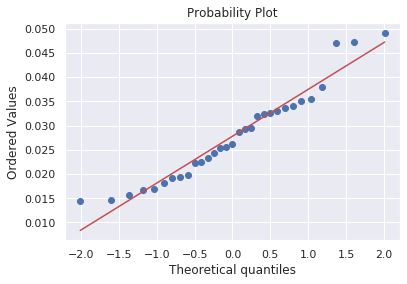

In [51]:
stats.probplot(data_filtered['conversionCummulativeA'], dist='norm', plot=plt);

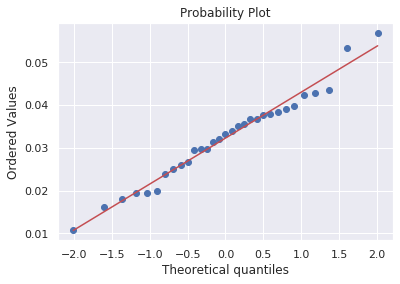

In [52]:
stats.probplot(data_filtered['conversionCummulativeB'], dist='norm', plot=plt);

In [53]:
#Проверим нормальность распределения кумулятивной конверсии группы B методом Шапиро-Уилка
alpha = .05 # критический уровень статистической значимости

results = st.shapiro(data_filtered['conversionCummulativeB'])
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. Распределение нормальное")

p-значение:  0.8228167295455933
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. Распределение нормальное


In [54]:
#Проверим нормальность распределения кумулятивной конверсии группы A методом Шапиро-Уилка
alpha = .05 # критический уровень статистической значимости

results = st.shapiro(data_filtered['conversionCummulativeA'])
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. Распределение нормальное")

p-значение:  0.08201996982097626
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. Распределение нормальное


####  Судя по графикам и Шапиро Уилку распределение нормальное. Считаем по z-критерию можно ли сделать вывод о разнице в конверсии

In [55]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([data_filtered['ordersPerDateA'].sum(),data_filtered['ordersPerDateB'].sum()])
trials = np.array([data_filtered['visitorsPerDateA'].sum(), data_filtered['visitorsPerDateB'].sum()])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным

Если бы пропорции были равны, разница между ними была бы равна нулю. Посчитаем, как далеко статистика уехала от нуля. Какова вероятность получить такое отличие или больше? Так как распределение статистики нормальное, вызовем метод cdf(). Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака. Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат:

In [56]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.02339333138804056
Отвергаем нулевую гипотезу: между долями есть значимая разница


#### Выводы и предположения
Результаты по конверсии не изменились. По сырым данным p-value было 0.023
- p-value 0.023, это намного меньше 0.05. То есть нулевую гипотезу о том, что конверсия не отличается по разным выборкам, отвергаем.

#### Предположение
Средняя конверсия в выборке B значимо отличается от средней конверсии в выборке А. Вероятно, наша тестируемая влияет на конверсию

### Средний чек по очищенным данным

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

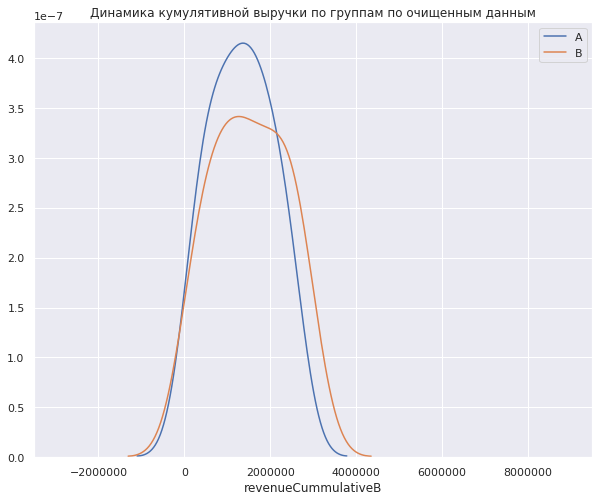

In [57]:
#### Гистограмма распределения кумулятивной выручки по группам
sns.set()
plt.figure(figsize=(10,8))
plt.xlim(-3500000, 9500000)
plt.xlabel('Кумулятивная выручка по группам')
plt.title('Динамика кумулятивной выручки по группам по очищенным данным')

sns.distplot(ordersACummulative_filtered['revenueCummulativeA'], hist=False, rug=False, label='A')
sns.distplot(ordersBCummulative_filtered['revenueCummulativeB'], hist=False, rug=False, label='B');

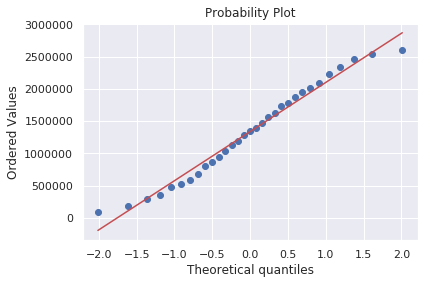

In [58]:
stats.probplot(ordersACummulative_filtered['revenueCummulativeA'], dist='norm', plot=plt);

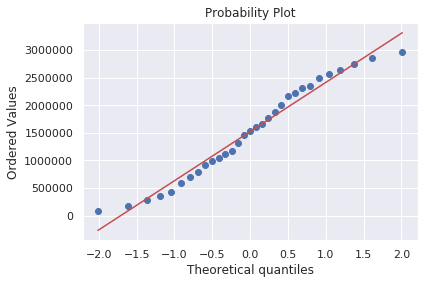

In [59]:
stats.probplot(ordersBCummulative_filtered['revenueCummulativeB'], dist='norm', plot=plt);

Распределение, график и Шапиро Уилка говорят что распределение нормальное. Проверим статзначимость различий t-критерием Стьюдента  

In [60]:
sample_1 = orders_filtered[orders_filtered['group']=='A']['revenue']
sample_2 = orders_filtered[orders_filtered['group']=='B']['revenue']


alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу:  между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение: 0.8397672556239649
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Выводы
- P-value = 0.839, значительно больше 0.05. 
- Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

#### Предположение
Возможно, эксперимент не влияет на средний чек

-------

### Примите решение по результатам теста и объясните его.
Варианты решений:

- Остановить тест, зафиксировать победу одной из групп.

- Остановить тест, зафиксировать отсутствие различий между группами.

- Продолжить тест.

Какие выводы по тесту можем сделать?
Имеющиеся факты:
- Есть статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий; 
- По сырым данным и по очищенным данным различие в конверсии групп A и B есть (p-value = 0.023 меньше 0.05)


- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий (P-value по очищенным данным = 0.839, значительно больше 0.05).

- График различия конверсии между группами сообщает, что результаты группы B превышают результаты A и фиксируется на уровне более +0.1
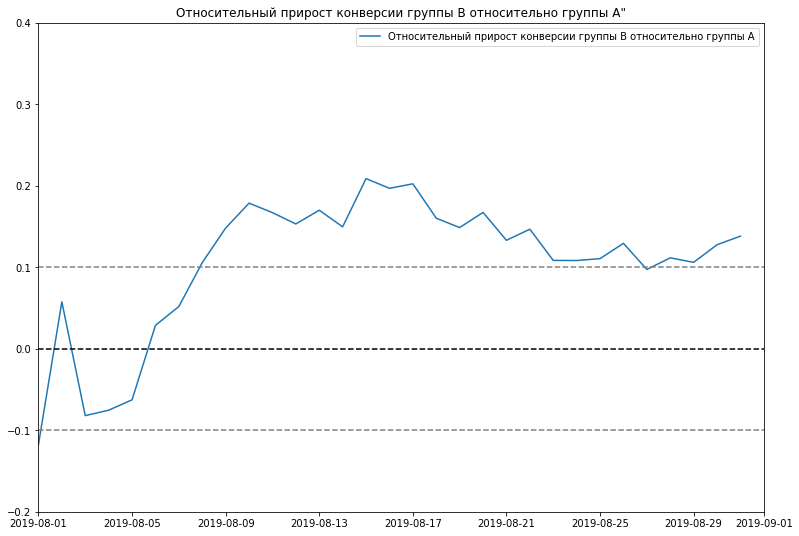

- График различия среднего чека говорит о том, что результаты группы B в основном выше чем результаты группы А:
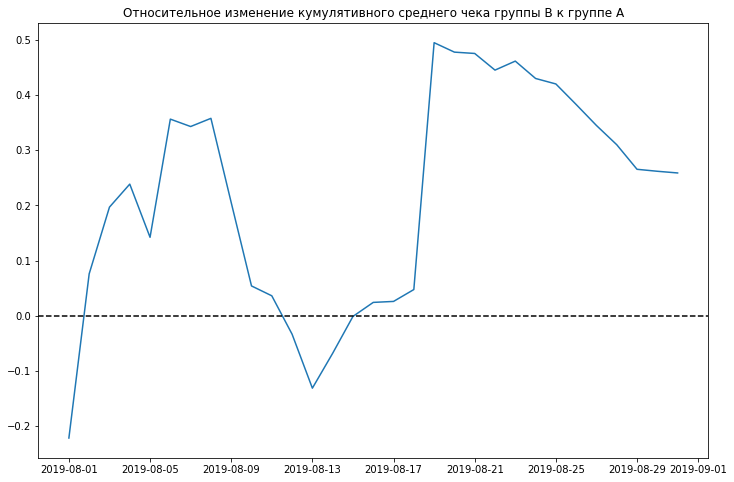

### Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. 
- Конверсия значимо растет на +0.1% в группе B.
- На средний чек эксперимент не влияет.
- Наш эксперимент вырастил конверсию, но никак не повлиял на средний чек.
- Изменение рекомендовано к выкатке.